In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Import the Data
Let's extract the our **Titanic data** from the .csv file, create a  pandas DataFrame and look at the available indicators:

- ***Survived***: Outcome of survival (0 = No; 1 = Yes)
- ***Pclass***: Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class)
- ***Name***: Name of passenger
- ***Sex***: Sex of the passenger
- ***Age***: Age of the passenger (Some entries contain NaN)
- ***SibSp***: Number of siblings and spouses of the passenger aboard
- ***Parch***: Number of parents and children of the passenger aboard
- ***Ticket***: Ticket number of the passenger
- ***Fare***: Fare paid by the passenger
- ***Cabin***: Cabin number of the passenger (Some entries contain NaN)
- ***Embarked***: Port of embarkation of the passenger (C = Cherbourg; Q = Queenstown; S = Southampton)

In [2]:
df = pd.read_csv("titanic_dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.shape

(891, 12)

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Distribution plots

In [6]:
df['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6])

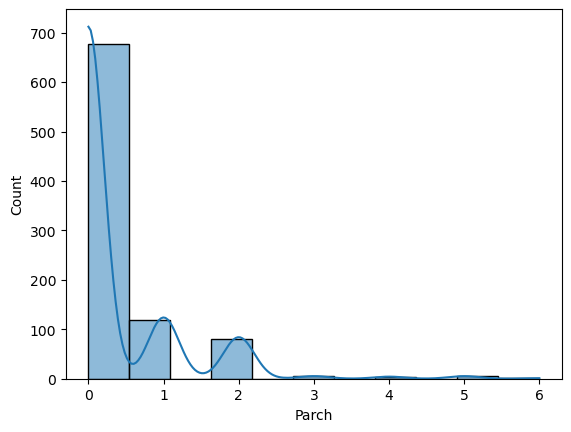

In [7]:
sns.histplot(df['Parch'],kde=True)
plt.show()

**As we can see, most passengers don't have neither parents nor children aboard.**

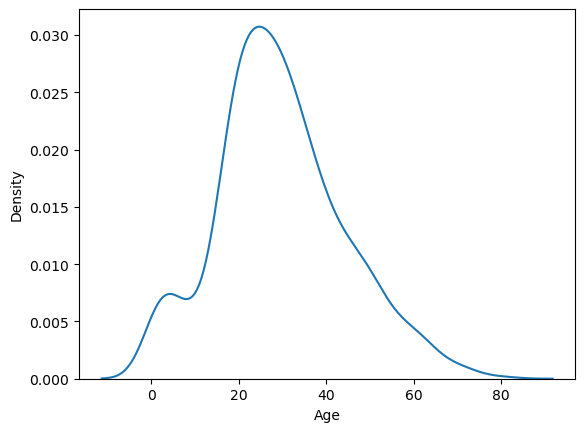

In [8]:
sns.distplot(df['Age'], hist=False)
plt.show()

**As we can see that most of the passenger has the age between 20 to 40**

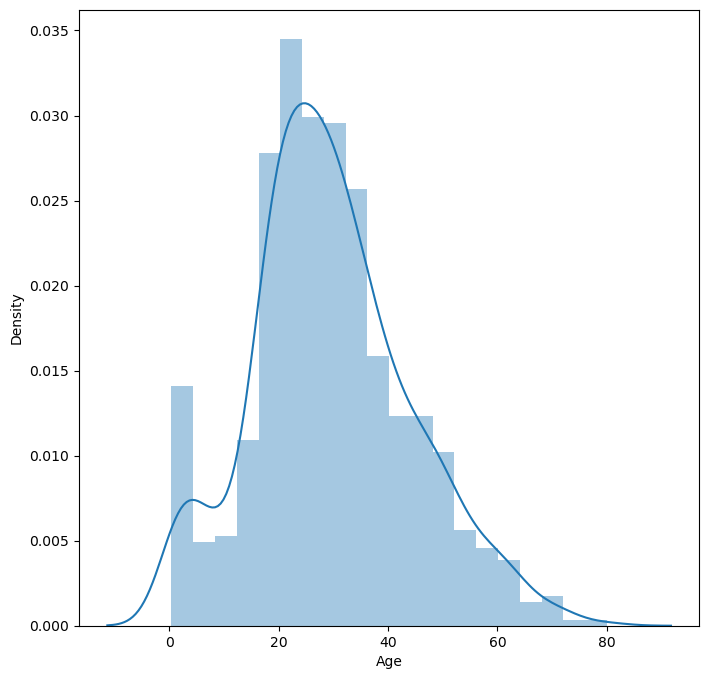

In [9]:
plt.figure(figsize=(8,8))
sns.distplot(df['Age'])
plt.show()

In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

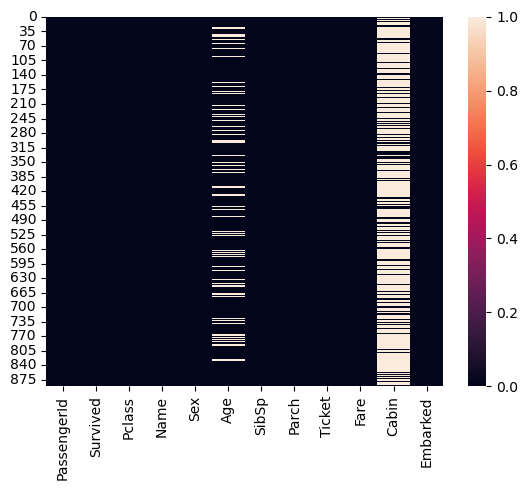

In [11]:
sns.heatmap(df.isnull())

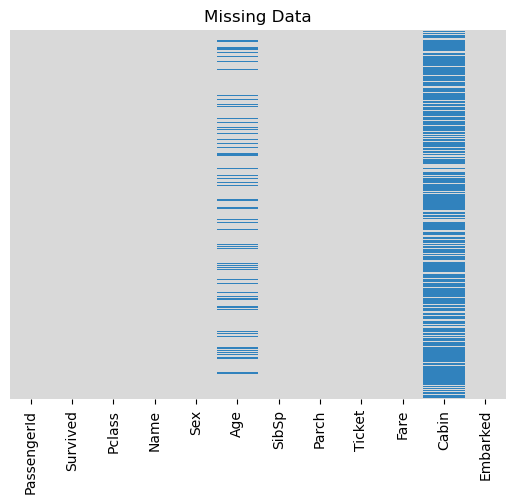

In [12]:
# Heatmap
sns.heatmap(df.isnull(),yticklabels = False, cbar = False,cmap = 'tab20c_r')
plt.title('Missing Data')
plt.show()

In [13]:
df['Age'].median()

28.0

In [14]:
df['Age'].mean()

np.float64(29.69911764705882)

<Axes: ylabel='Age'>

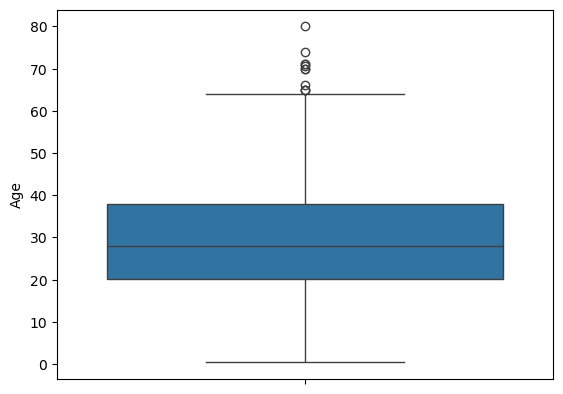

In [15]:
sns.boxplot(df['Age'])

In [16]:
Q1 = df["Age"].quantile(0.25)
Q3 = df["Age"].quantile(0.75)
IQR = Q3 - Q1
Q1
Q3
IQR

np.float64(17.875)

In [17]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound)
print(upper_bound)

-6.6875
64.8125


In [18]:
df_filtered = df[(df["Age"] >= lower_bound) & (df["Age"] <= upper_bound)]

print(f"Original Rows: {df.shape[0]}, Filtered Rows: {df_filtered.shape[0]}")

Original Rows: 891, Filtered Rows: 703


In [19]:
891-703

188

In [20]:
df_filtered

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [21]:
df_filtered.index

Index([  0,   1,   2,   3,   4,   6,   7,   8,   9,  10,
       ...
       880, 881, 882, 883, 884, 885, 886, 887, 889, 890],
      dtype='int64', length=703)

In [22]:
df.index.isin(df_filtered.index)

array([ True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True, False,  True,  True,  True,  True,  True,  True, False,
        True, False, False,  True, False, False, False,  True,  True,
       False,  True,  True,  True,  True,  True, False,  True,  True,
       False, False, False, False,  True,  True,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True, False,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True, False, False,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True, False,
        True, False,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True, False,  True,  True,  True,  True,
       False,  True,

In [23]:
print(df[~df.index.isin(df_filtered.index)]) 

     PassengerId  Survived  Pclass                                      Name  \
5              6         0       3                          Moran, Mr. James   
17            18         1       2              Williams, Mr. Charles Eugene   
19            20         1       3                   Masselmani, Mrs. Fatima   
26            27         0       3                   Emir, Mr. Farred Chehab   
28            29         1       3             O'Dwyer, Miss. Ellen "Nellie"   
..           ...       ...     ...                                       ...   
859          860         0       3                          Razi, Mr. Raihed   
863          864         0       3         Sage, Miss. Dorothy Edith "Dolly"   
868          869         0       3               van Melkebeke, Mr. Philemon   
878          879         0       3                        Laleff, Mr. Kristo   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   

        Sex  Age  SibSp  Parch      Tic

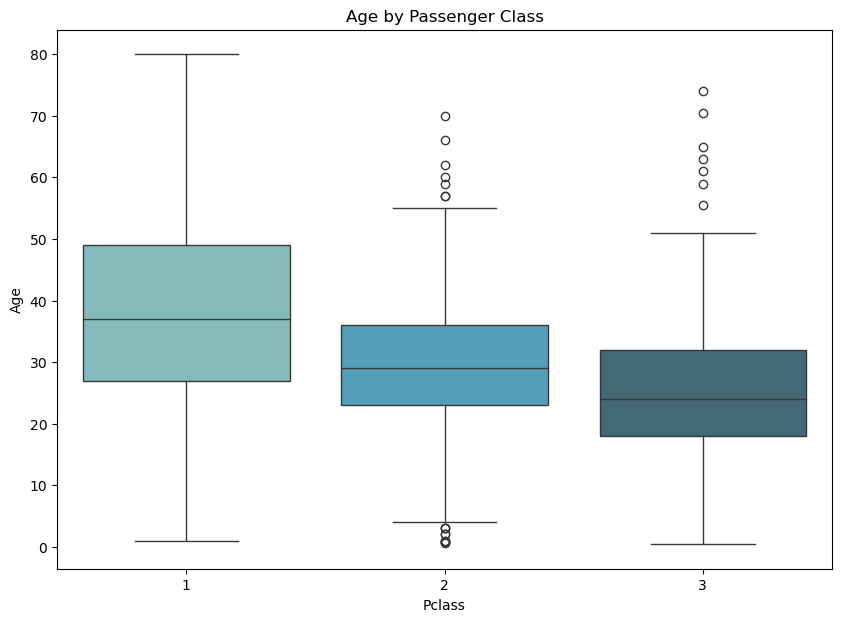

In [24]:
plt.figure(figsize = (10,7))
sns.boxplot(x = 'Pclass', y = 'Age', data = df, palette= 'GnBu_d').set_title('Age by Passenger Class')
plt.show()

In [25]:
# Imputation function
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age


In [26]:
# Apply the function to the Age column
df['Age']=df[['Age','Pclass']].apply(impute_age, axis =1)

In [27]:
df['Age'].isnull().sum()

np.int64(0)

<Axes: >

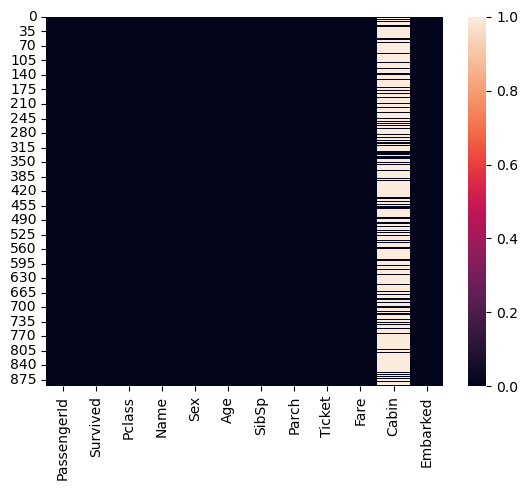

In [28]:
sns.heatmap(df.isnull())

In [29]:
df_filtered = df[(df["Age"] >= lower_bound) & (df["Age"] <= upper_bound)]

print(f"Original Rows: {df.shape[0]}, Filtered Rows: {df_filtered.shape[0]}")

Original Rows: 891, Filtered Rows: 880


In [30]:
891-880

11

<Axes: ylabel='Age'>

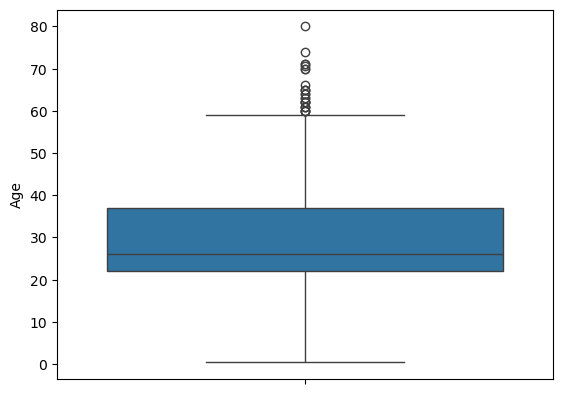

In [31]:
sns.boxplot(df['Age'])

In [32]:
# Remove Cabin feature
df.drop('Cabin', axis = 1, inplace = True)

<Axes: >

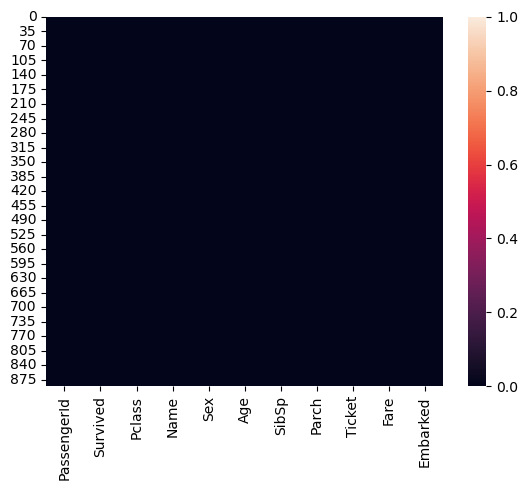

In [33]:
sns.heatmap(df.isnull())

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [35]:
df = df.dropna()

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


## **Relational plots**

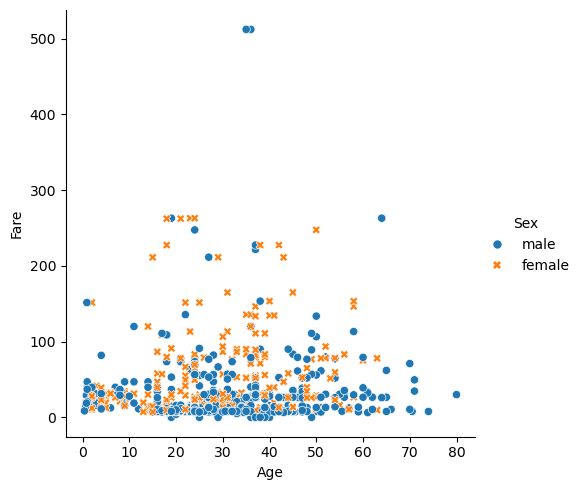

In [37]:
sns.relplot(x="Age", y="Fare",hue='Sex',style='Sex', data=df)

In [38]:
df['Pclass'].unique()

array([3, 1, 2])

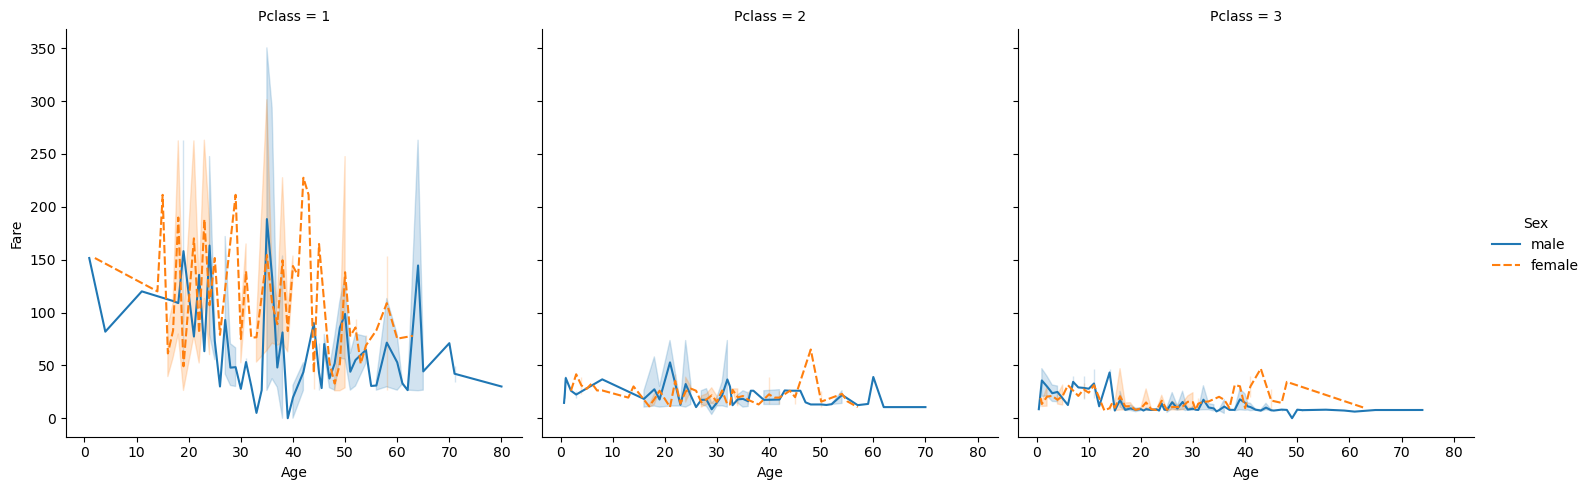

In [39]:
sns.relplot(x="Age", y="Fare", col="Pclass", hue="Sex", style="Sex",kind="line", data=df)
plt.show()

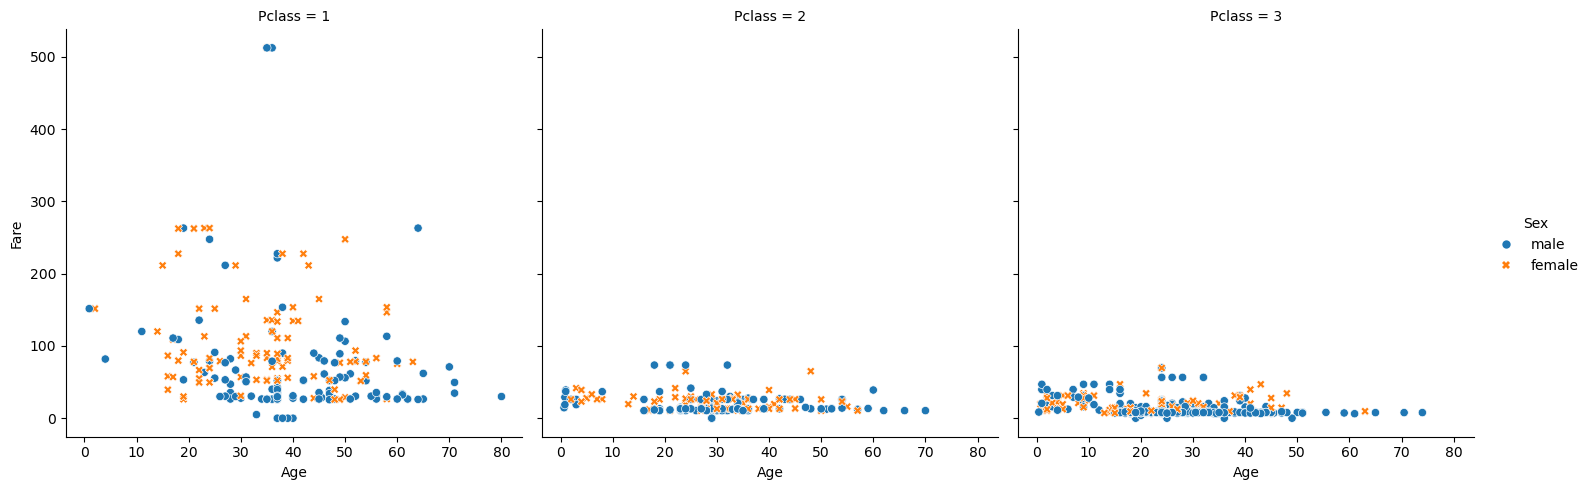

In [40]:
# scatter can be used instead of "line" plot
sns.relplot(x="Age", y="Fare", col="Pclass", hue="Sex", style="Sex", data=df)
plt.show()

## **Scatterplot**

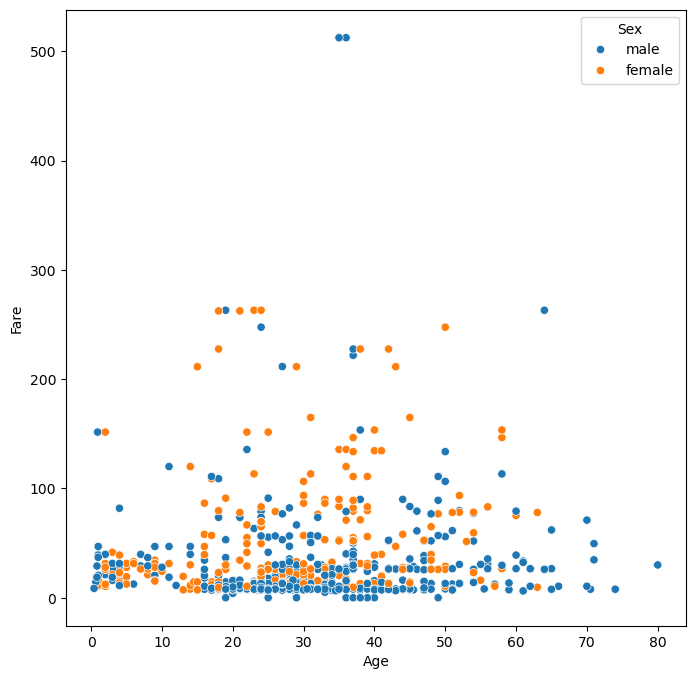

In [41]:
plt.figure(figsize=(8,8))
sns.scatterplot(x="Age", y="Fare", hue="Sex", data=df)
plt.show()

## **lineplot**

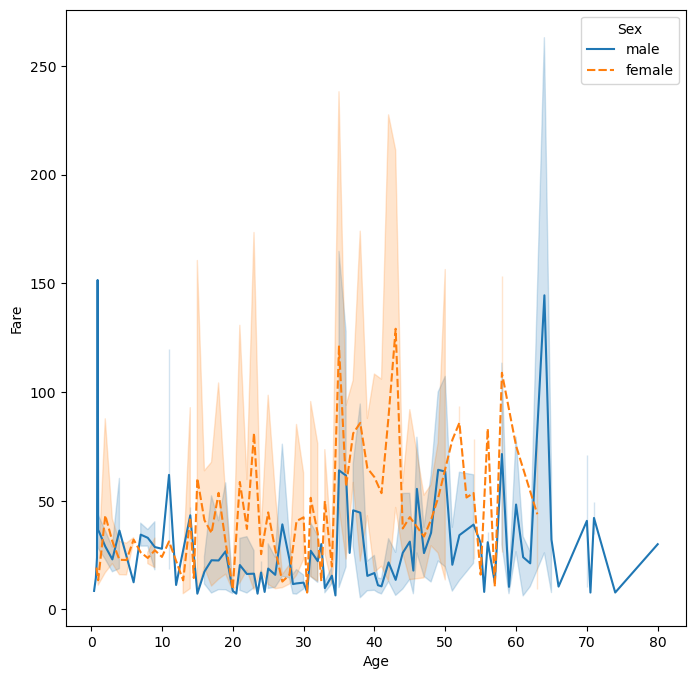

In [42]:
plt.figure(figsize=(8,8))
sns.lineplot(x="Age", y="Fare", hue="Sex", style="Sex", data=df)
plt.show()

# **Categorical Plot**

### **barplot**

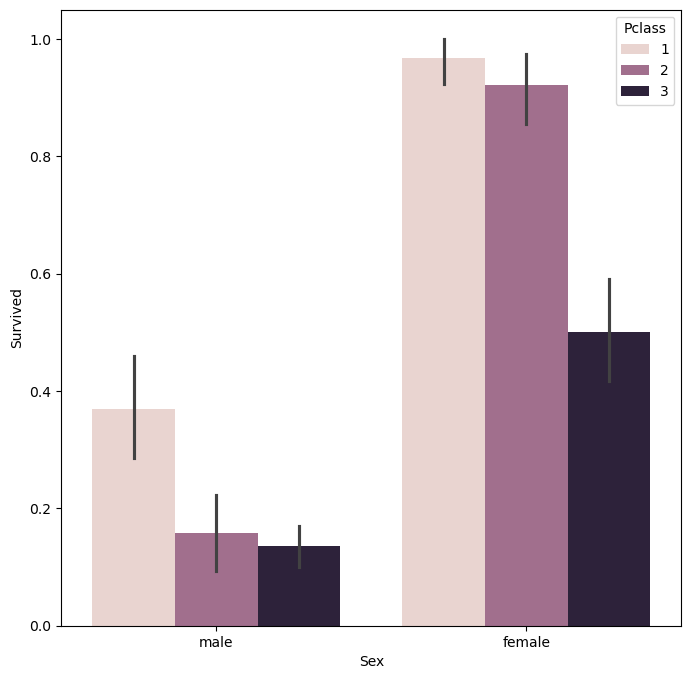

In [43]:
plt.figure(figsize=(8,8))
sns.barplot(x="Sex", y="Survived", hue="Pclass", data=df)
plt.show()

**As we can see, More women survived than men.**

### **stripplot**

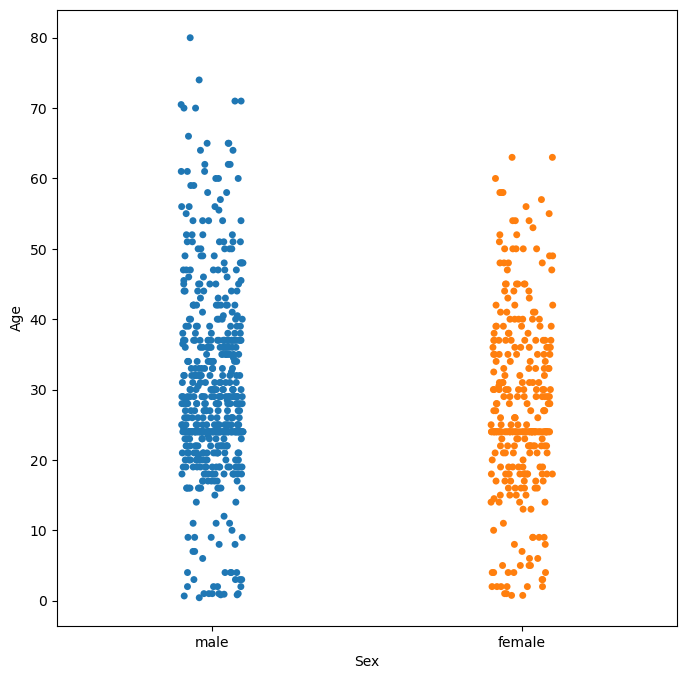

In [44]:
plt.figure(figsize=(8,8))
sns.stripplot(x="Sex", y="Age",hue='Sex', data=df)
plt.show()

### **swarmplot**

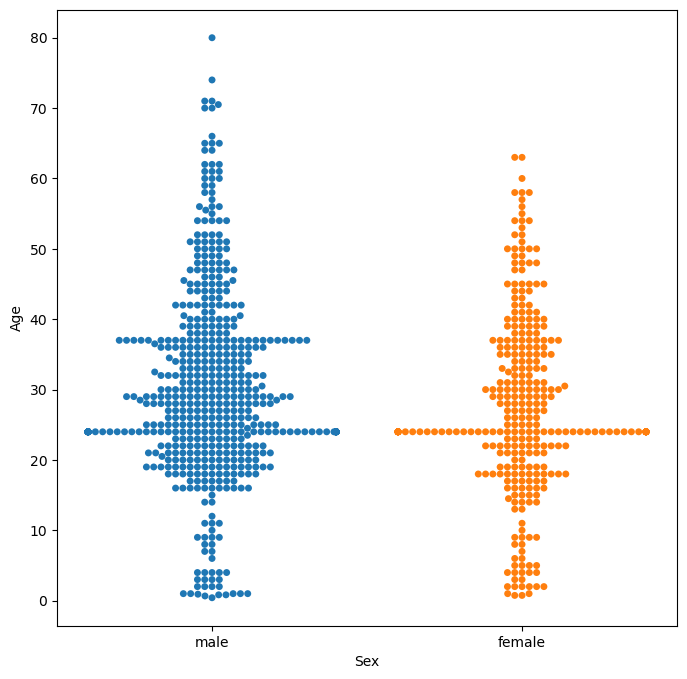

In [45]:
plt.figure(figsize=(8,8))
sns.swarmplot(x="Sex", y="Age",hue='Sex', data=df)
plt.show()

**We can said that more passengers are approximally between 18 and 40 years old.**

### **violinplot**

Violin Plots are a combination of the box plot with the kernel density estimates. So, these plots are easier to analyze and understand the distribution of the data.

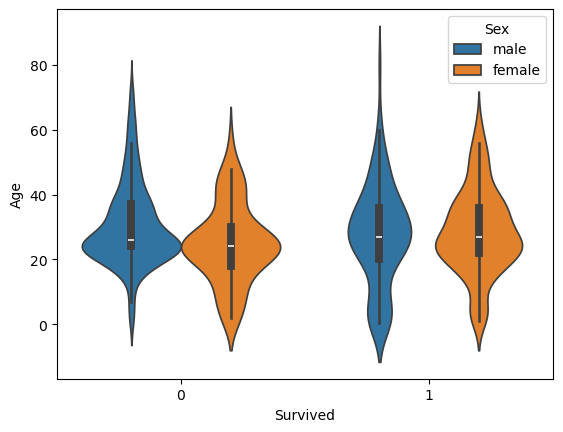

In [46]:
sns.violinplot(x="Survived", y="Age", hue='Sex', data=df)
plt.show()

### **Countplot**

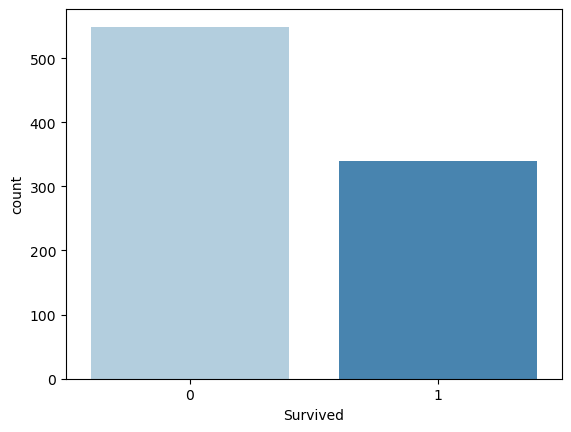

In [47]:
sns.countplot(x="Survived", data=df, palette="Blues");
plt.show()

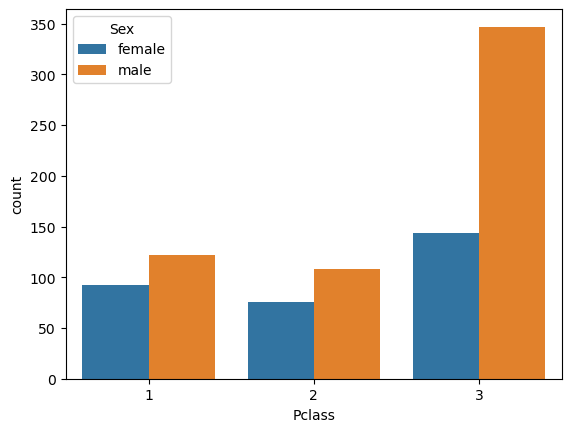

In [48]:
sns.countplot(x = "Pclass", hue = "Sex",data = df)
plt.show()

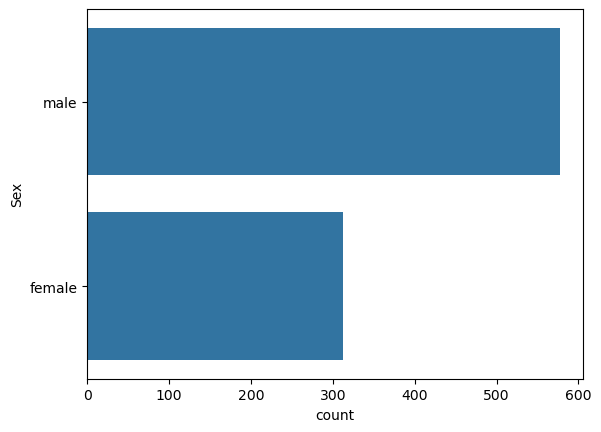

In [49]:
sns.countplot(y = "Sex", data = df)
plt.show()

## **Multi-plot grids**

### **Facet grids**

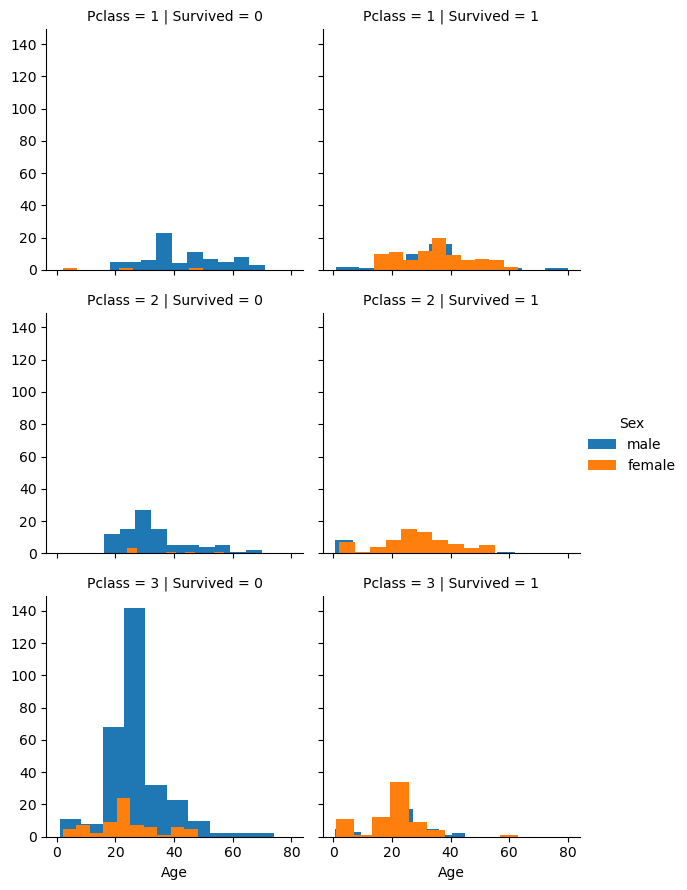

In [50]:
# initialize the FacetGrid object
g = sns.FacetGrid(df, col='Survived', row='Pclass',hue='Sex')

g.map(plt.hist, 'Age')
g.add_legend()
plt.show()

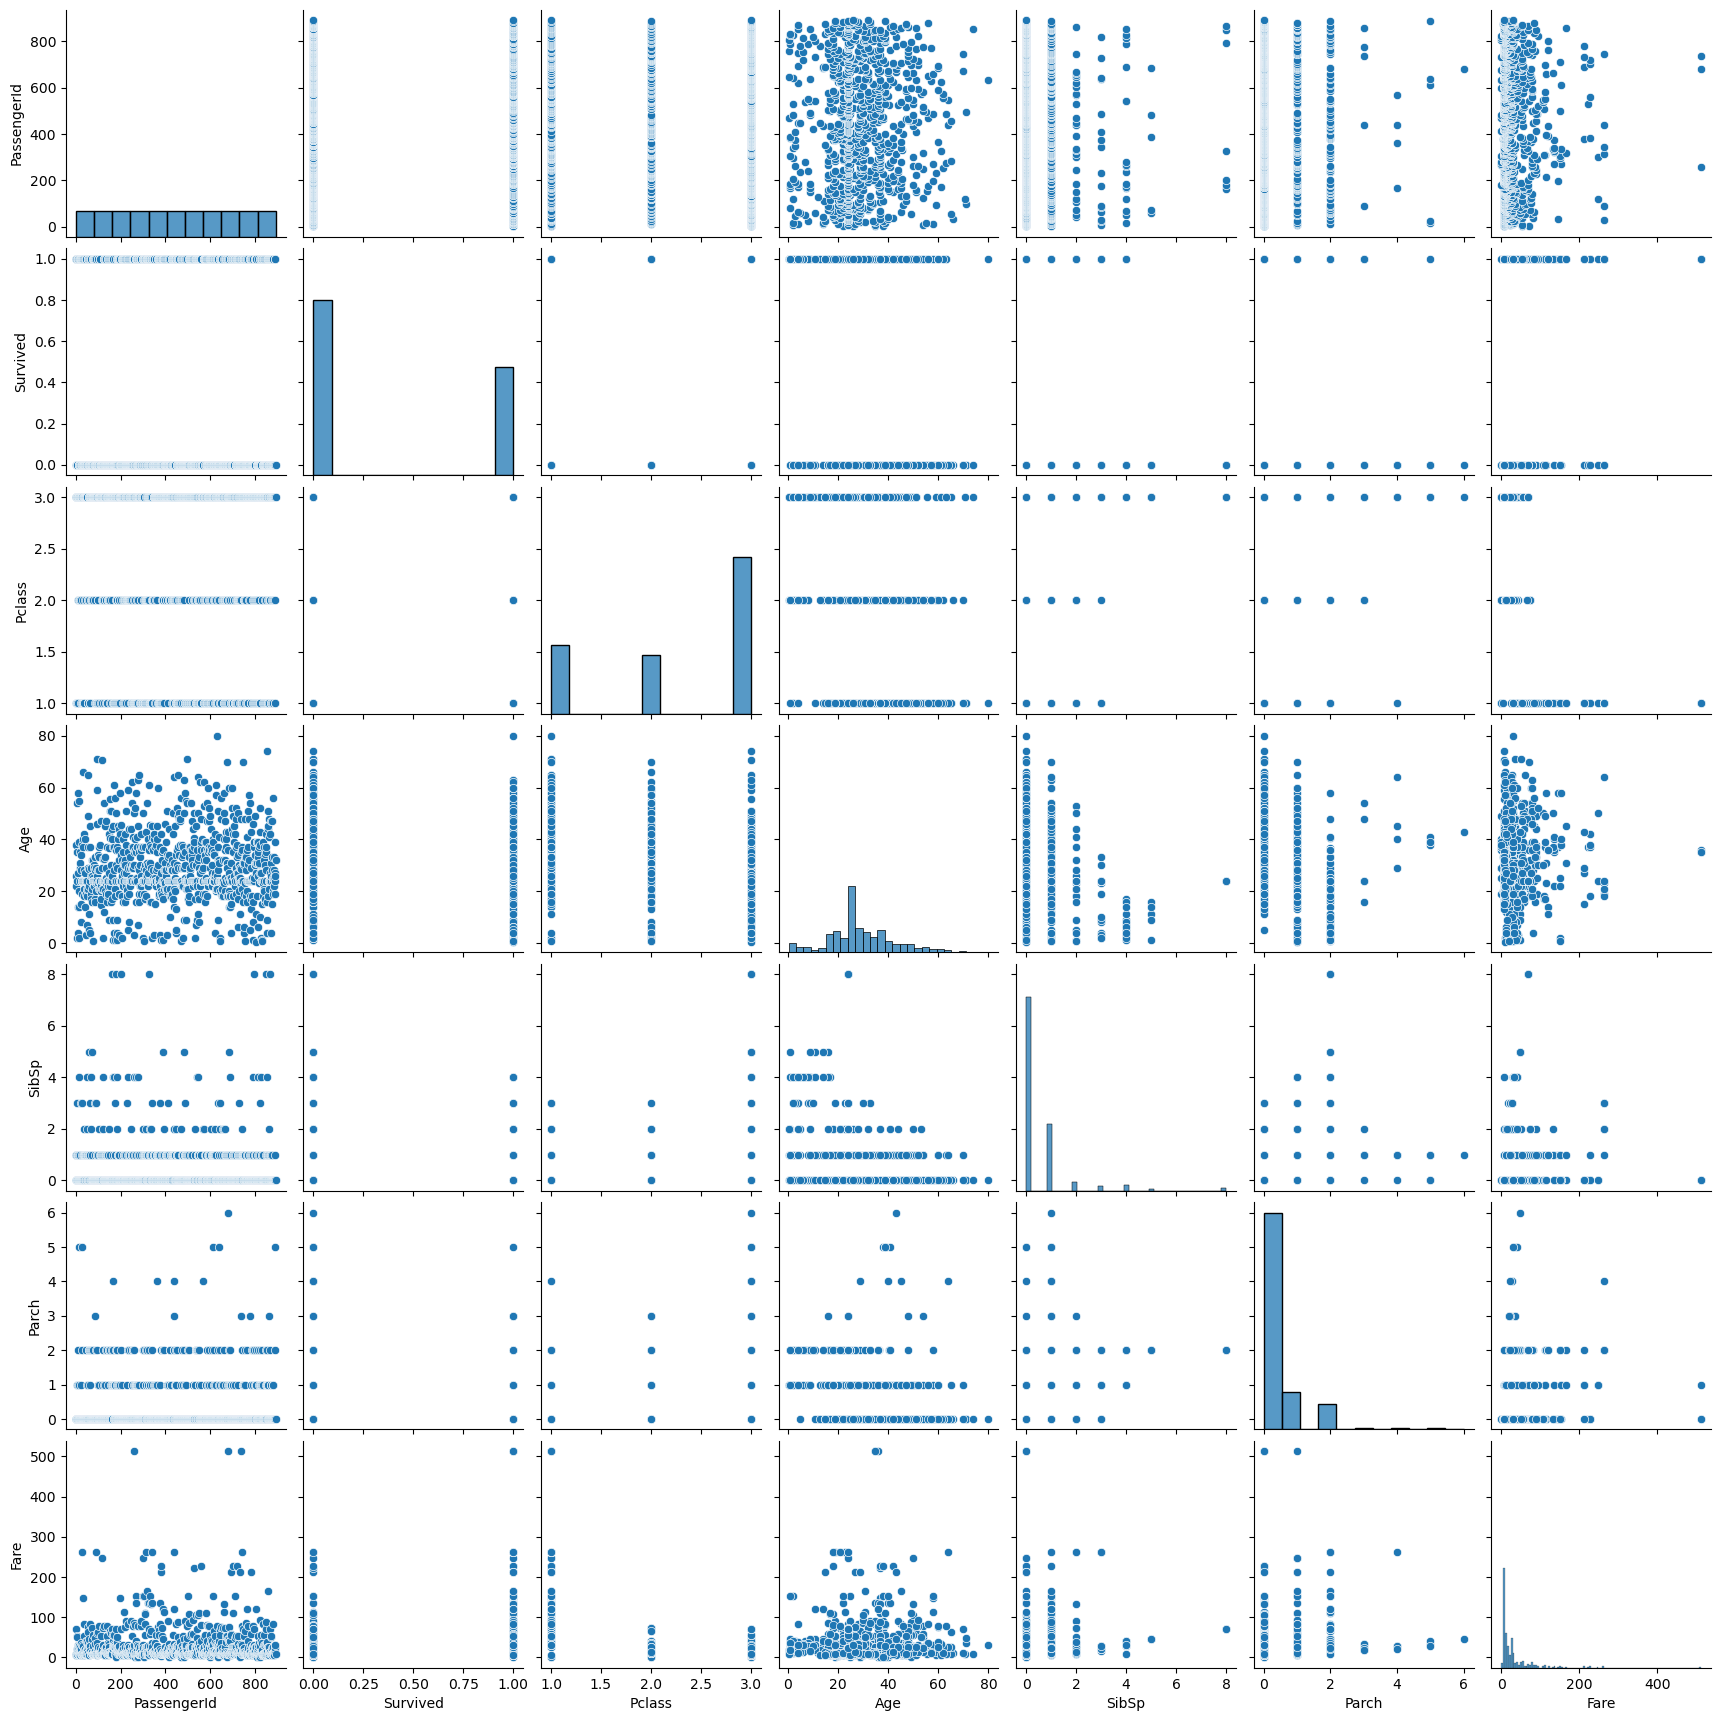

In [51]:
sns.pairplot(data=df)
plt.show()

## **Matrix plots**

### **heatmap**

In [ ]:
df.corr()

#ValueError: could not convert string to float:

In [53]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
numeric_df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,24.0,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


In [54]:
numeric_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
dtype: object

In [55]:
numeric_df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005028,-0.035330,0.033008,-0.057686,-0.001657,0.012703
Survived,-0.005028,1.000000,-0.335549,-0.052051,-0.034040,0.083151,0.255290
Pclass,-0.035330,-0.335549,1.000000,-0.405549,0.081656,0.016824,-0.548193
Age,0.033008,-0.052051,-0.405549,1.000000,-0.242807,-0.170089,0.120938
SibSp,-0.057686,-0.034040,0.081656,-0.242807,1.000000,0.414542,0.160887
Parch,-0.001657,0.083151,0.016824,-0.170089,0.414542,1.000000,0.217532
Fare,0.012703,0.255290,-0.548193,0.120938,0.160887,0.217532,1.000000


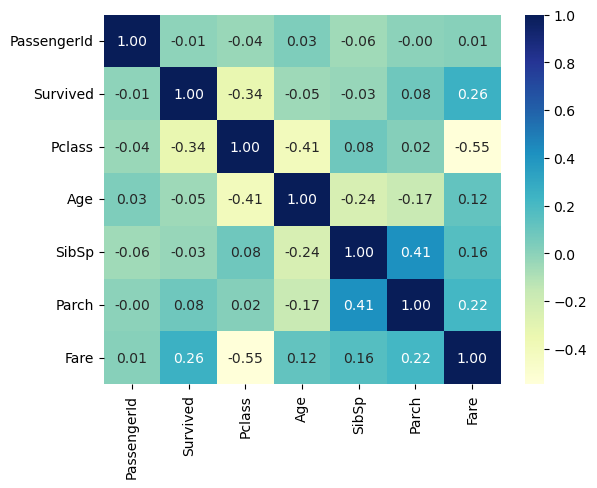

In [56]:
sns.heatmap(numeric_df.corr(), cmap="YlGnBu", annot=True, fmt=".2f")
plt.show()

### ***No Correlation in dataset***.